<a href="https://www.kaggle.com/code/abbas829/data-analysis-with-pandas?scriptVersionId=296311758" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🌯 Chipotle Data Analysis: A Beginner's Guide to Pandas

![Chipotle Banner](https://upload.wikimedia.org/wikipedia/en/thumb/3/3b/Chipotle_Mexican_Grill_logo.svg/200px-Chipotle_Mexican_Grill_logo.svg.png)

## 👋 Introduction
Welcome to this **interactive tutorial** on analyzing real-world data using Pandas! 

In this notebook, we will explore a dataset of **Chipotle orders**. As a Data Analyst for Chipotle, your task is to dig into the data, answer key business questions, and derive insights about customer preferences and sales.

## 🎯 Objectives
- **Load and Inspect Data**: Learn how to read TSV files and glimpse the raw data.
- **Data Cleaning**: Handle data types (converting currency strings to floats).
- **Exploratory Analysis**: Calculate revenue, find popular items, and analyze averages.
- **Visualization**: Use charts to showcase your findings.

---
### 🛠️ Libraries & Setup
First, let's import the necessary libraries. We'll use `pandas` for data manipulation and `matplotlib`/`seaborn` for visualization.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")
%matplotlib inline


## 📂 Step 1: Loading the Data
The dataset is hosted on GitHub. Since it's a **TSV** (Tab Separated Values) file, we need to specify the separator `sep='\t'`.

> **Pro Tip**: By default, `read_csv` expects comma-separated values. Always check your file's delimiter!


In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')


**Excellent!** The data is now loaded into a DataFrame called `chipo`.


## 🧐 Step 2: First Look at the Data
Let's verify the data loaded correctly by peeking at the first 10 rows.
*Question: What does a single row represent?*


In [3]:
chipo.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


**Observation**: Each row represents an item in an order. Notice that `order_id` is repeated, meaning one order can contain multiple items.


## 📏 Step 3: Dataset Dimensions
How much data do we have? Let's check the number of rows (observations) and columns.


In [4]:
chipo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


**Insight**: 
- `4622` entries (rows).
- `5` columns.
- Notice `choice_description` has some null values (NaN), likely meaning no specific choice was made (e.g., for Chips).


## 📋 Step 4: Columns & Indexing
Let's list out our column names to understand our features.


In [5]:
chipo.columns


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

And check how the DataFrame is indexed:


In [6]:
chipo.index


RangeIndex(start=0, stop=4622, step=1)

## 🏆 Step 5: What is the Most Popular Item?
Let's determine which item appears most frequently in orders.

*Logic*: We count the occurrences of each `item_name` and find the top one.


In [7]:
# Get the top 5 most ordered items
item_counts = chipo['item_name'].value_counts()
most_ordered = item_counts.head(5)
print("Top 5 Items:")
print(most_ordered)

print(f"\nThe most ordered item is: {item_counts.idxmax()}")


Top 5 Items:
item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: count, dtype: int64

The most ordered item is: Chicken Bowl


### 📊 Visualization: Top 5 Popular Items
A bar chart makes this ranking instantly clear.


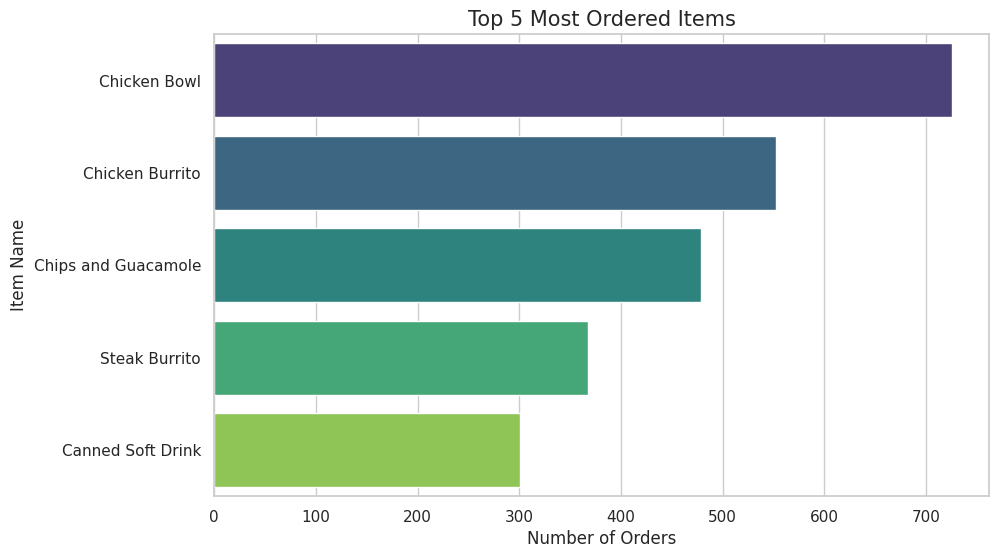

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=most_ordered.values, y=most_ordered.index, palette='viridis')
plt.title('Top 5 Most Ordered Items', fontsize=15)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Item Name', fontsize=12)
plt.show()


## 🥤 Step 6: Most Popular Choice
Some items like Canned Soda have choices (e.g., Diet Coke). What's the most popular choice overall?


In [9]:
chipo['choice_description'].value_counts().head(1)


choice_description
[Diet Coke]    134
Name: count, dtype: int64

## 📦 Step 7: Total Items Ordered
How many items were ordered in total (sum of all quantities)?


In [10]:
total_items = chipo['quantity'].sum()
print(f"Total items ordered: {total_items}")


Total items ordered: 4972


## 🧹 Step 8: Data Cleaning (Item Price)
We want to calculate revenue, but look at the `item_price` column type:


In [11]:
print(chipo.item_price.dtype)


object


It's an `object` (string) because of the `$` sign. We need to convert it to a `float`.

**Strategy**:
1. Remove the `$` character.
2. Convert the type to `float`.


In [12]:
# Create a function to strip '$' and convert to float
def dollarizer(x):
    return float(x[1:-1])

# Apply it
chipo['item_price'] = chipo['item_price'].apply(dollarizer)

# Verify
print(chipo.item_price.dtype)
chipo.head()


float64


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


### 💸 Visualization: Price Distribution
Now that it's numeric, let's see how expensive the items are.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


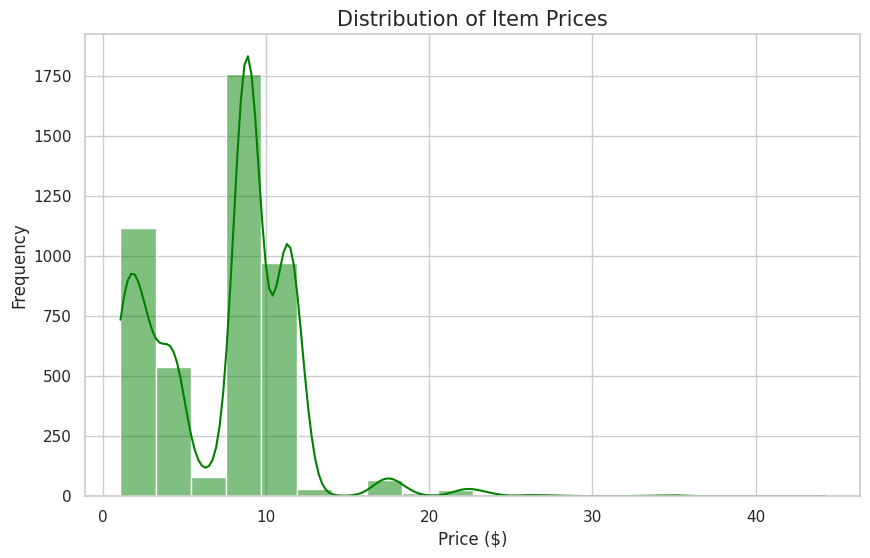

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(chipo['item_price'], bins=20, kde=True, color='green')
plt.title('Distribution of Item Prices', fontsize=15)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


## 💰 Step 9: Total Revenue
Revenue = Quantity * Price.
Let's calculate the total revenue for the period.


In [14]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(f"Total Revenue: ${revenue:,.2f}")


Total Revenue: $39,237.02


## 🧾 Step 10: Total Orders
How many unique orders were placed?


In [15]:
orders = chipo.order_id.value_counts().count()
print(f"Number of unique orders: {orders}")


Number of unique orders: 1834


## 💵 Step 11: Average Revenue per Order
On average, how much does a customer spend per order?


In [16]:
avg_revenue = revenue / orders
print(f"Average Revenue per Order: ${avg_revenue:,.2f}")


Average Revenue per Order: $21.39


## 🔢 Step 12: Variety of Items
How many *unique* items are sold at Chipotle?


In [17]:
unique_items = chipo.item_name.value_counts().count()
print(f"Number of unique items sold: {unique_items}")


Number of unique items sold: 50


---
## 🏁 Conclusion
We've successfully explored the Chipotle dataset! We learned how to:
1. Load TSV data.
2. clean currency strings.
3. specific grouping and aggregating.

**Well done!** 🚀

### 👨‍💻 About the Author
**Author**: Tassawar Abbas

**Contact**: [abbas829@gmail.com](mailto:abbas829@gmail.com)
